In [1]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional,GlobalMaxPool1D,SpatialDropout1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

In [2]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load
from nltk.stem.isri import ISRIStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data import 

In [5]:
import pandas as pd


data1 = pd.read_table('./data/twitter-2016train-A.txt' , usecols=[0,1,2], encoding='utf-8', names=['id','sentiment', 'tweet'])
data2 = pd.read_table('./data/twitter-2016test-A.txt' , usecols=[0,1,2], encoding='utf-8', names=['id','sentiment', 'tweet'])
df = pd.concat([data1,data2],axis=0,ignore_index=True)
#dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

,id,sentiment,tweet
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
...,...,...,...
26495,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...
26496,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless..."
26497,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...
26498,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...


# add label

In [6]:
CATEGORY_INDEX = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

"""import data """
raw_label = df['sentiment'].values.tolist()
rawlabel = []
for i in range(len(raw_label)):
    rawlabel.append(CATEGORY_INDEX[raw_label[i]])
rawlabel

[-1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 0

In [7]:
df['label'] = rawlabel
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
26495,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,0
26496,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",1
26497,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,0
26498,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,-1


In [4]:
df_back = df.copy()
df_back

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


# data preprocessing

## 1 data cleansing 

In [8]:
df = df.dropna()

In [9]:
def clean_base(tweets, clean_object):
        #tweets.loc[:, "tweet"].replace(clean_object, "", inplace=True)
        tweets = re.sub(clean_object, ' ', tweets)
        return tweets

In [10]:
def remove_urls(tweets):
        return clean_base(tweets, re.compile(r"http.?://[^\s]+[\s]?"))

In [11]:
def remove_usernames(tweets):
        return clean_base(tweets, re.compile(r"@[^\s]+[\s]?"))

In [12]:
def remove_hashtags(tweets):  # it unrolls the hashtags to normal words
        for hashtag in map(lambda x: re.compile(re.escape(x)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
            tweets = re.sub(hashtag, ' ', tweets)
        return tweets

In [13]:
def remove_numbers(tweets):
        return clean_base(tweets, re.compile(r"\s?[0-9]+\.?[0-9]*"))

In [14]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [15]:
##############################################

In [16]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [17]:
###############################################################

In [18]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = remove_usernames(doc)
    #Replace url with empty string
    doc = remove_urls(doc)

    
    #doc = re.sub(r'@[^\s]+', ' ', doc)
    #doc = re.sub(r'_', ' ', doc)
    
    
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('(www\.[^\s])',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    
    #Replace numbers with empty string
    doc = remove_numbers(doc)
    #Replace @username with empty string
    doc = remove_hashtags(doc)
    # remove repeated letters
    #doc=remove_repeating_char(doc)
    
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear the newOoffice for Mac is great and all ...,-1
1,628976607420645377,negative,how about you make a system that doesnt eat m...,-1
2,629023169169518592,negative,I may be ignorant on this issue but should we ...,-1
3,629179223232479232,negative,Thanks to I just may be switching over to,-1
4,629186282179153920,neutral,If I make a game as a windows Universal App Wi...,0
...,...,...,...,...
26495,681877834982232064,neutral,from what I think youre asking in no order Fu...,0
26496,681879579129200640,positive,Iran ranks st in liver surgeries Allah bless t...,1
26497,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,0
26498,681904976860327936,negative,Alex Kim Kardashian worth how to love Kim Ka...,-1


In [19]:
stopwords=nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
whitelist = ["n't","dn","en","tn","not","sn"]
stop = []
co = []
for idx, stop_word in enumerate(stopwords):
    count = 0
    for whiteword in whitelist:
        if whiteword in stop_word:
                count +=1
    co.append(count)
    if not count != 0:
        stop.append(stop_word)
       
            
    #if stop_word not in whitelist:
        #stop.append(stop_word)

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'once',
 'here',
 'there',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',


In [22]:
#df.to_csv('./data.csv')

# tokenization and stem

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from time import time

In [24]:
########################################trail 1#######################################################

In [25]:
Data = df['tweet'].tolist()
for i in range(len(Data)):
    Data[i] = nltk.word_tokenize(Data[i])
Data

[['dear',
  'the',
  'newOoffice',
  'for',
  'Mac',
  'is',
  'great',
  'and',
  'all',
  'but',
  'no',
  'Lync',
  'update',
  'Cmon'],
 ['how',
  'about',
  'you',
  'make',
  'a',
  'system',
  'that',
  'doesnt',
  'eat',
  'my',
  'friggin',
  'discs',
  'This',
  'is',
  'the',
  'nd',
  'time',
  'this',
  'has',
  'happened',
  'and',
  'I',
  'am',
  'so',
  'sick',
  'of',
  'it'],
 ['I',
  'may',
  'be',
  'ignorant',
  'on',
  'this',
  'issue',
  'but',
  'should',
  'we',
  'celebrate',
  'parental',
  'leave',
  'changes',
  'Doesnt',
  'the',
  'gender',
  'divide',
  'suggest'],
 ['Thanks', 'to', 'I', 'just', 'may', 'be', 'switching', 'over', 'to'],
 ['If',
  'I',
  'make',
  'a',
  'game',
  'as',
  'a',
  'windows',
  'Universal',
  'App',
  'Will',
  'xboxone',
  'owners',
  'be',
  'able',
  'to',
  'download',
  'and',
  'play',
  'it',
  'in',
  'November'],
 ['Microsoft',
  'I',
  'may',
  'not',
  'prefer',
  'your',
  'gaming',
  'branch',
  'of',
  'busine

In [26]:
STOP_WORDS = stop
def lemmatize_sentence(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token.lower(), pos)

        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation and len(token) > 2 and token not in STOP_WORDS:
            cleaned_tokens.append(token)
            
    return cleaned_tokens
# Prevewing the remove_noise() output

In [27]:
data_pro = []

# Removing noise from all the data
for tokens in Data:
    data_pro.append(lemmatize_sentence(tokens))
data_pro

[['dear', 'newooffice', 'mac', 'great', 'lync', 'update', 'cmon'],
 ['make',
  'system',
  'doesnt',
  'eat',
  'friggin',
  'disc',
  'time',
  'happen',
  'sick'],
 ['may',
  'ignorant',
  'issue',
  'celebrate',
  'parental',
  'leave',
  'change',
  'doesnt',
  'gender',
  'divide',
  'suggest'],
 ['thanks', 'may', 'switch'],
 ['make',
  'game',
  'window',
  'universal',
  'app',
  'xboxone',
  'owner',
  'able',
  'download',
  'play',
  'november'],
 ['microsoft',
  'may',
  'not',
  'prefer',
  'game',
  'branch',
  'business',
  'make',
  'damn',
  'fine',
  'operating',
  'system',
  'window'],
 ['downgrade', 'let', 'window', 'almost', 'try', 'windowsfail'],
 ['computer', 'error', 'windowsfail', 'guess', 'shelve'],
 ['order',
  'ever',
  'tablet',
  'surface',
  'pro',
  'igb',
  'ssd',
  'hopefully',
  'work',
  'dev',
  'replace',
  'laptop'],
 ['attempt',
  'reinstall',
  'still',
  'bricks',
  'say',
  'window',
  'not',
  'finish',
  'installing',
  'somesuch',
  'may',


## word to vector

In [30]:
import gensim
import gensim.models
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec

In [52]:
w2v_model = Word2Vec(data_pro, min_count=1,workers=3, window =3, sg = 1)

C:\Users\luche\.conda\envs\aml\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\luche\.conda\envs\aml\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


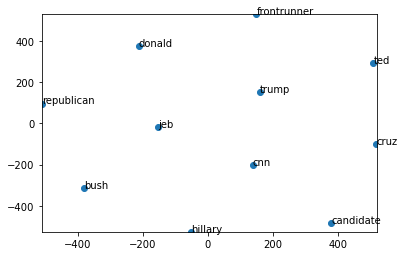

In [65]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)

    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
display_closestwords_tsnescatterplot(w2v_model, 'trump', 100)

In [104]:
path_to_glove_file = "./glove.twitter.27B.200d.txt"

In [31]:
glove_file = "./glove.twitter.27B.200d.txt"
tmp_file = get_tmpfile("./glove.twitter.27B.200d.word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

w2v_model = KeyedVectors.load_word2vec_format(tmp_file)


C:\Users\luche\AppData\Local\Temp/ipykernel_28080/481496700.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [117]:
#model.save('glove_w2v.model')

In [93]:
w2v_model = KeyedVectors.load("./w2vmodel/glove_twitter_200d.model")

In [66]:
word_dict = {}
for word in list(w2v_model.wv.index_to_key):
    word_dict[word] = w2v_model.wv[word]

In [68]:
embedding_model = w2v_model
Embedding_dim = embedding_model.vector_size

word2idx = {'PAD': 0}
# 所有词对应的嵌入向量 [(word, vector)]
vocab_list = [word for word in enumerate(embedding_model.wv.key_to_index.keys())]
embeddings_matrix = np.zeros((len(vocab_list) + 1,embedding_model.vector_size))
# word2idx 字典
for i in range(len(vocab_list)):
    word = vocab_list[i][1]
    word2idx[word] = i + 1
    embeddings_matrix[i + 1] = word_dict[word]

# 初始化keras中的Embedding层权重
embedding_layer = Embedding(input_dim=len(embeddings_matrix),
                  output_dim=Embedding_dim,
                  weights=[embeddings_matrix], # 预训练参数
                  trainable=False)

In [70]:
unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res
def create_data(data_pro,word_to_index):
    list_len = [len(i) for i in data_pro]
    max_len = max(list_len)
    print('max_len:', max_len)

    X = np.zeros((len(data_pro), max_len))


    for i, tk_lb in enumerate(data_pro):
        tokens= tk_lb
        sentence_indices = []
        for j, w in enumerate(tokens):
            try:
                index = word_to_index[w]
            except:
                UNKS.append(w)
                w = cleared(w)
                try:
                    index = word_to_index[w]
                except:
                    index = word_to_index['unk']
                    unks.append(w)
            X[i, j] = index
    return X

X = create_data(data_pro,embedding_model.wv.key_to_index)


max_len: 545


In [71]:
Y = np.zeros((len(df), ))

for i  in range(len(df)):
    Y[i] = df['label'][i]

In [72]:
from tensorflow.keras.utils import to_categorical
Y1 = to_categorical(Y,3)
Y1

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [73]:
my_seed = 22
np.random.seed(my_seed)

In [126]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(embedding_layer)
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(GlobalMaxPool1D())
#model.add(Dropout(rate=0.4))
#model.add(Bidirectional(LSTM(units=64, return_sequences=False)))

#model.add(Dropout(rate=0.4))
#model.add(Dense(units=1, activation='sigmoid'))

model.add(Dense(units=64,kernel_initializer="uniform",activation='relu'))        
model.add(Dense(units=3,kernel_initializer="uniform",activation='softmax'))


model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         238703000 
_________________________________________________________________
bidirectional_9 (Bidirection (None, None, 128)         135680    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 195       
Total params: 238,847,131
Trainable params: 144,131
Non-trainable params: 238,703,000
_________________________________________________________________


In [74]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(embedding_layer)
model.add(SpatialDropout1D(0.1))
#model.add(Bidirectional(LSTM(128,return_sequences=True), merge_mode = 'concat'))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(128,return_sequences=False))
#model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense((3), activation="softmax"))


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2543200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 100)         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [75]:
optimizer = tf.optimizers.RMSprop(learning_rate= 0.0001, rho=0.9)
#optimizer =tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='CategoricalCrossentropy', optimizer=optimizer, metrics=['accuracy'])

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size=0.2, random_state=22)

In [77]:
filepath='./data/weights.best-no-glove.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath= filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='min', verbose=1, restore_best_weights = True)
callbacks_list = [checkpoint,earlyStop]

In [78]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, batch_size = 128, shuffle=True,callbacks=callbacks_list)

Epoch 1/50
 12/166 [=>............................] - ETA: 7:12 - loss: 1.0950 - accuracy: 0.4616

KeyboardInterrupt: 

In [ ]:
model.save('./lstm-4-7.h5')

In [107]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

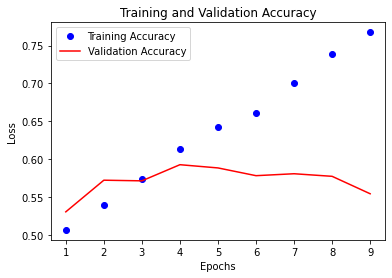

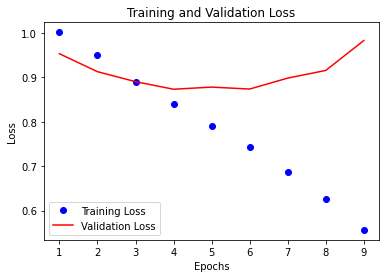

In [108]:
plot_acc_loss(model.history)